<a href="https://colab.research.google.com/github/N1a2t3a/.Data_Science/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import zipfile
import os

In [3]:
zip_path = "/content/data.zip"
extract_path = "/content/data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
df_2d = pd.read_csv(os.path.join(extract_path, "data", "data_2d.csv"))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

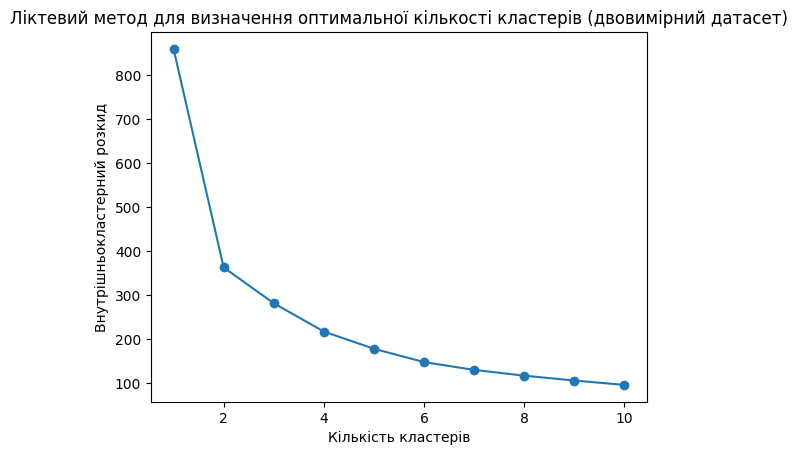

In [10]:
feature_columns = df_2d.columns

num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_2d[feature_columns])
    inertia.append(kmeans.inertia_)

plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерний розкид')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів (двовимірний датасет)')
plt.show()


In [11]:
mnist = fetch_openml('mnist_784')
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
pca = PCA(n_components=2)
X_mnist_2d = pca.fit_transform(X_mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

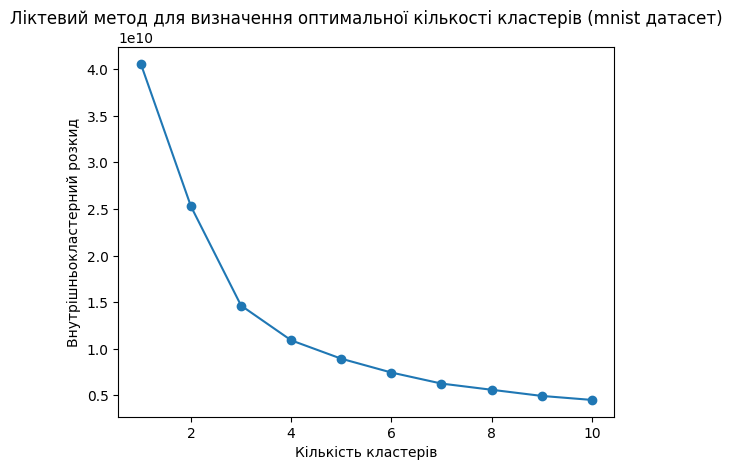

In [13]:
num_clusters_mnist = range(1, 11)
inertia_mnist = []

for k in num_clusters_mnist:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_mnist_2d)
    inertia_mnist.append(kmeans.inertia_)

plt.plot(num_clusters_mnist, inertia_mnist, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерний розкид')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів (mnist датасет)')
plt.show()

In [15]:
optimal_num_clusters_mnist = 3

In [16]:
kmeans_mnist = KMeans(n_clusters=optimal_num_clusters_mnist)
y_mnist_pred = kmeans_mnist.fit_predict(X_mnist_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


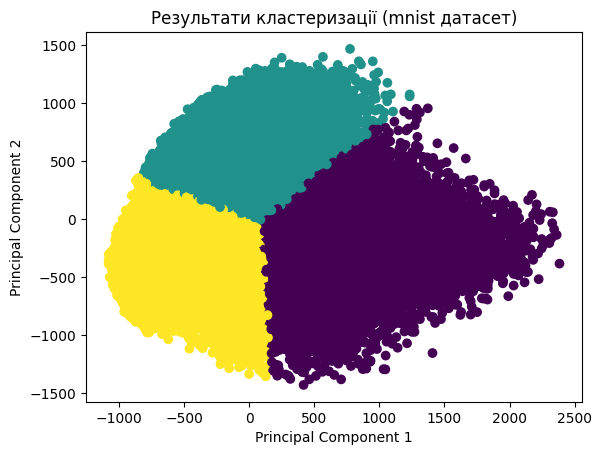

In [17]:
plt.scatter(X_mnist_2d[:, 0], X_mnist_2d[:, 1], c=y_mnist_pred, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Результати кластеризації (mnist датасет)')
plt.show()